In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.3
3.4.2


In [4]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [5]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(4)

In [6]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [7]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [8]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ArrayOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over_time at 0x000001BAD68C8860>)
ArrayOutcome('Dike Investment Costs', variable_name=('A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs'), function=<function sum_over_time at 0x000001BAD68C8860>)
ArrayOutcome('Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'), function=<function sum_over_time at 0x000001BAD68C8860>)
ArrayOutcome('RfR Total Costs')
ArrayOutcome('Expected Evacuation Costs')


In [9]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [00:04<00:00, 45.91it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [10]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,47,91.003174,1.0,0.853652,235.736728,1.5,0.473705,163.057908,10.0,0.185665,...,9,2,7,2,2,4,1,4,0,dikesnet
1,128,210.112677,1.5,0.958008,337.262884,10.0,0.591857,300.272812,1.0,0.575765,...,9,2,7,2,2,4,1,5,0,dikesnet
2,114,275.596289,10.0,0.782792,262.647462,1.5,0.650999,308.987185,10.0,0.061068,...,9,2,7,2,2,4,1,6,0,dikesnet
3,20,304.923100,1.5,0.580951,232.827513,1.5,0.666980,52.333622,10.0,0.871161,...,9,2,7,2,2,4,1,7,0,dikesnet
4,10,123.810823,10.0,0.542493,105.865103,10.0,0.090548,282.451091,10.0,0.834190,...,9,2,7,2,2,4,1,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,43,288.919678,10.0,0.910951,60.929057,10.0,0.848855,342.715025,1.0,0.035029,...,4,6,1,6,8,2,3,49,3,dikesnet
196,76,163.961050,10.0,0.164798,326.076096,10.0,0.204427,149.886402,10.0,0.947442,...,4,6,1,6,8,2,3,50,3,dikesnet
197,99,195.861719,1.5,0.685669,268.170870,10.0,0.429743,57.339443,1.5,0.205617,...,4,6,1,6,8,2,3,51,3,dikesnet
198,2,332.424524,10.0,0.471435,142.253636,1.5,0.171568,206.291242,1.5,0.929003,...,4,6,1,6,8,2,3,52,3,dikesnet


In [11]:
# only works because we have scalar outcomes
#pd.DataFrame(outcomes)
outcomes

{'Expected Annual Damage': array([[3.49993232e+06, 0.00000000e+00, 0.00000000e+00],
        [4.23887544e+06, 0.00000000e+00, 0.00000000e+00],
        [1.77312195e+07, 0.00000000e+00, 0.00000000e+00],
        [6.83674300e+07, 1.66639516e+07, 0.00000000e+00],
        [4.90509903e+06, 0.00000000e+00, 0.00000000e+00],
        [1.37347608e+07, 4.82536192e+06, 0.00000000e+00],
        [2.44930543e+06, 0.00000000e+00, 0.00000000e+00],
        [2.90071711e+06, 0.00000000e+00, 0.00000000e+00],
        [8.75714725e+07, 7.60413139e+06, 0.00000000e+00],
        [4.56829333e+06, 6.25847257e+06, 0.00000000e+00],
        [6.86966576e+06, 0.00000000e+00, 0.00000000e+00],
        [2.27497799e+06, 0.00000000e+00, 0.00000000e+00],
        [3.52834121e+07, 2.40932816e+06, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.49104999e+07, 6.25847257e+06, 0.00000000e+00],
        [4.80703495e+06, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.000

In [12]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [13]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:07<00:00, 42.43it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [14]:
experiments, outcomes = results

In [15]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

ValueError: Per-column arrays must each be 1-dimensional

GSA without Policies

In [18]:
from ema_workbench import (
    perform_experiments, Samplers, Policy
)
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol
from problem_formulation import get_model_for_problem_formulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from ema_workbench import MultiprocessingEvaluator

# Detect number of physical/logical cores
import multiprocessing

total_cores = multiprocessing.cpu_count()  # e.g., 16 logical cores for Ryzen 7700X
desired_cores = total_cores // 2  # use 50% of your CPU (adjust as needed)

N = 512  # Sobol sample base size
with MultiprocessingEvaluator(model, n_processes=desired_cores) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(
        scenarios=N,
        policies=[zero_policy],
        uncertainty_sampling=Samplers.SOBOL
    )

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 20480 scenarios * 1 policies * 1 model(s) = 20480 experiments

100%|████████████████████████████████████| 20480/20480 [11:38<00:00, 29.32it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [28]:
outcomes

{'Expected Annual Damage': array([[5.27201327e+07, 5.27201327e+07, 5.27201327e+07],
        [8.23425537e+07, 8.23425537e+07, 8.23425537e+07],
        [5.27201327e+07, 5.27201327e+07, 5.27201327e+07],
        ...,
        [8.46258504e+08, 1.37773980e+09, 1.37773980e+09],
        [8.46258504e+08, 1.37773980e+09, 6.93813437e+08],
        [8.46258504e+08, 1.37773980e+09, 1.37773980e+09]], shape=(20480, 3)),
 'Dike Investment Costs': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], shape=(20480, 3)),
 'Expected Number of Deaths': array([[0.06245712, 0.06245712, 0.06245712],
        [0.09610844, 0.09610844, 0.09610844],
        [0.06245712, 0.06245712, 0.06245712],
        ...,
        [0.67477895, 0.67477895, 0.67477895],
        [0.67477895, 0.67477895, 0.67477895],
        [0.67477895, 0.67477895, 0.67477895]], shape=(20480, 3)),
 'RfR Total Costs': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]

In [29]:
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import numpy as np

# Step 1: Get the SALib problem setup
problem = get_SALib_problem(model.uncertainties)
expected_len = N * (len(problem['names']) + 2)

# Step 2: Initialize result dictionaries
sobol_results_mean = {}
sobol_results_std = {}
sobol_results_final = {}

# Step 3: Loop through outcomes and apply reduction
for outcome_name, values in outcomes.items():
    arr = np.asarray(values)[:expected_len]

    if arr.ndim == 1:
        # Already scalar
        y_mean = arr
        y_std = np.zeros_like(arr)
        y_final = arr
    elif arr.ndim == 2:
        # 2D array like (20480, 3)
        y_mean = arr.mean(axis=1)
        y_std = arr.std(axis=1)
        y_final = arr[:, -1]
    else:
        print(f"⚠️ Skipping unsupported shape: {outcome_name}, shape={arr.shape}")
        continue

    # Run Sobol analysis for each reduction
    sobol_results_mean[outcome_name] = sobol.analyze(problem, y_mean, calc_second_order=False)
    sobol_results_std[outcome_name] = sobol.analyze(problem, y_std, calc_second_order=False)
    sobol_results_final[outcome_name] = sobol.analyze(problem, y_final, calc_second_order=False)

C:\Users\muham\OneDrive - Delft University of Technology\Documents\Kuliah\S2\Q1.4\Model-based Decision Making\Assignments\venv\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
C:\Users\muham\OneDrive - Delft University of Technology\Documents\Kuliah\S2\Q1.4\Model-based Decision Making\Assignments\venv\Lib\site-packages\SALib\analyze\sobol.py:141: RuntimeWarning: invalid value encountered in divide
  Y = (Y - Y.mean()) / Y.std()


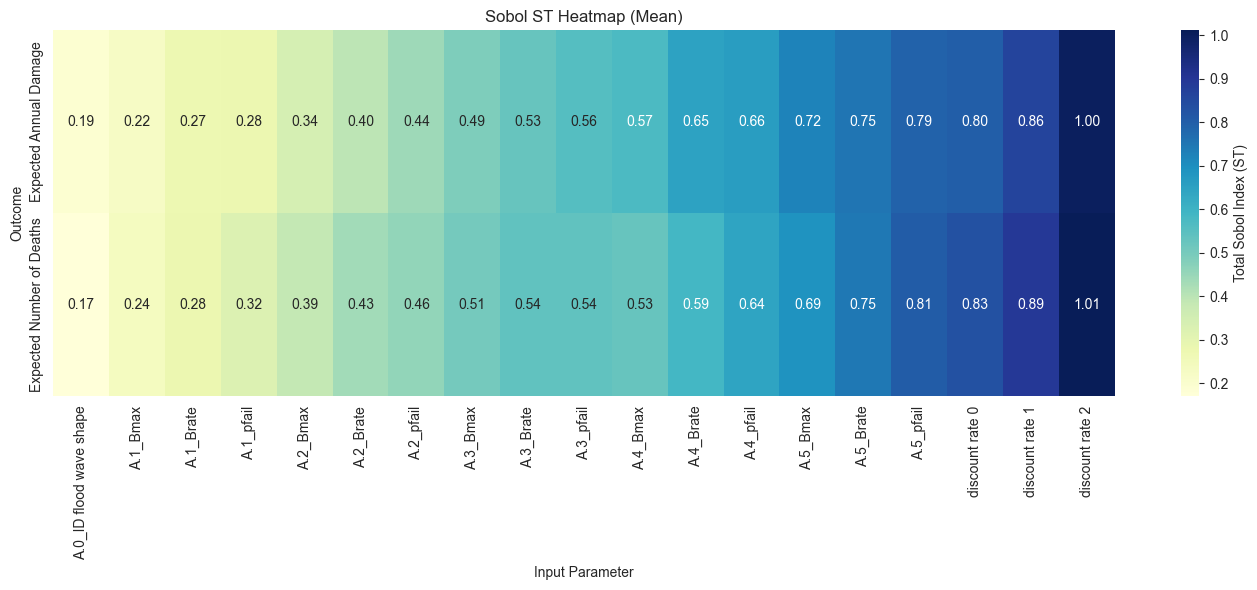

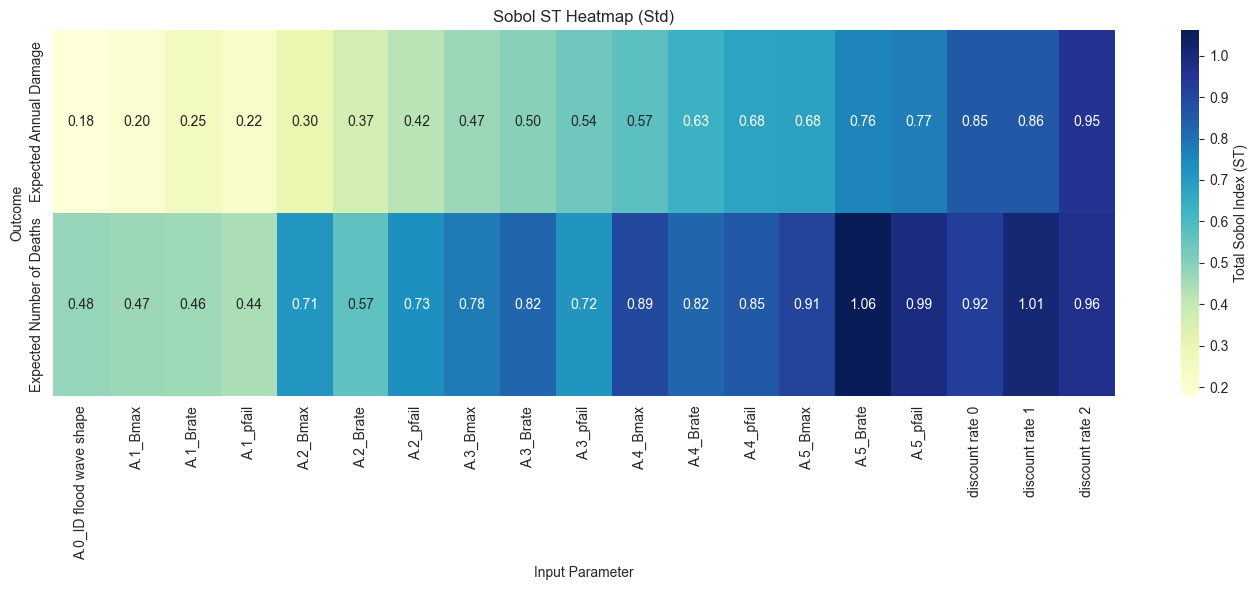

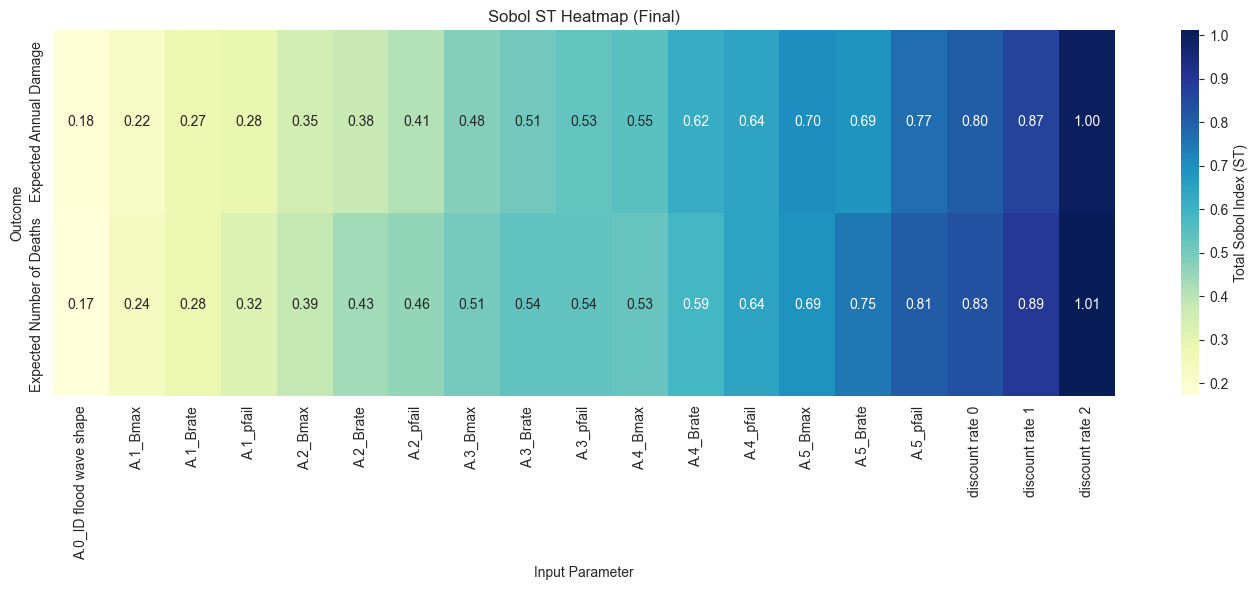

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract parameter names from the problem
parameter_names = problem['names']

# Convert a Sobol result dictionary into a tidy DataFrame
def sobol_to_dataframe(sobol_dict, parameter_names, label):
    records = []
    for outcome_name, Si in sobol_dict.items():
        for i, param in enumerate(parameter_names):
            records.append({
                'Outcome': outcome_name,
                'Parameter': param,
                'S1': Si['S1'][i],
                'ST': Si['ST'][i],
                'S1_conf': Si['S1_conf'][i],
                'ST_conf': Si['ST_conf'][i],
                'Reduction': label
            })
    return pd.DataFrame(records)

# Convert all three dictionaries to DataFrames
df_mean = sobol_to_dataframe(sobol_results_mean, parameter_names, 'Mean')
df_std = sobol_to_dataframe(sobol_results_std, parameter_names, 'Std')
df_final = sobol_to_dataframe(sobol_results_final, parameter_names, 'Final')

# Combine them all into one long-form DataFrame
df_all = pd.concat([df_mean, df_std, df_final], ignore_index=True)

# Plotting function for heatmaps
def plot_sobol_heatmap(df, reduction_type):
    pivot = df[df['Reduction'] == reduction_type].dropna(subset=["ST"])\
        .pivot(index='Outcome', columns='Parameter', values='ST')

    if pivot.empty:
        print(f"⚠️ No valid data to plot for reduction type: {reduction_type}")
        return

    plt.figure(figsize=(14, max(6, len(pivot) * 0.4)))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Total Sobol Index (ST)'})
    plt.title(f"Sobol ST Heatmap ({reduction_type})")
    plt.ylabel("Outcome")
    plt.xlabel("Input Parameter")
    plt.tight_layout()
    plt.show()

# Plot all three heatmaps
plot_sobol_heatmap(df_all, 'Mean')
plot_sobol_heatmap(df_all, 'Std')
plot_sobol_heatmap(df_all, 'Final')